In [1]:
import numpy as np

In [37]:
a = np.random.binomial(p = 0.2, n = 2, size = 10)
b = np.random.binomial( p = 0.5, n = 1, size = 9)#size = (2,1))
a,b

(array([2, 0, 1, 1, 0, 1, 2, 0, 1, 1]), array([1, 1, 1, 0, 1, 0, 0, 1, 0]))

In [38]:
sparse_array = np.random.binomial(p = 0.2, n = 2,size = 100)

In [39]:
sparse_array

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [41]:
indeces = np.where(sparse_array != 0)

In [42]:
values = sparse_array[indeces]

In [43]:
indeces, values

((array([ 1,  7,  8, 10, 13, 16, 21, 26, 32, 33, 36, 38, 40, 42, 43, 46, 49,
         55, 58, 59, 64, 72, 76, 79, 81, 83, 84, 87, 88, 89, 90, 96, 99]),),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]))

In [48]:
## So now we have to take sparse array and shift it, and truncate to not overflow, 
## say we take correlation length tau:

In [ ]:
## sparse_array_tau = sparse_array[t:]
## sparse_array = sparse_array[:-t]

# length is reduced by t, and we get indices of new arrays:
# 1. index_array_tau = (index_array-t)[index_array >t]
# 2. indeces_ = index_array[index_array < shape - t]

In [56]:
indeces_shifted = lambda k: (indeces[0]-k)[indeces[0]>=k]
indeces_0 = lambda k: indeces[0][indeces[0] < max(indeces[0])-k]
a = indeces_0(9)
b = indeces_shifted(9)
inds = np.where(a ==b)
np.mean(a[inds]*b[inds])

In [67]:
indeces

(array([ 1,  7,  8, 10, 13, 16, 21, 26, 32, 33, 36, 38, 40, 42, 43, 46, 49,
        55, 58, 59, 64, 72, 76, 79, 81, 83, 84, 87, 88, 89, 90, 96, 99]),)

In [60]:
indeces_shifted(10)

array([ 0,  3,  6, 11, 16, 22, 23, 26, 28, 30, 32, 33, 36, 39, 45, 48, 49,
       54, 62, 66, 69, 71, 73, 74, 77, 78, 79, 80, 86, 89])

In [110]:
from matplotlib import pyplot as plt

In [113]:
arr = np.random.binomial(p = 0.2, n = 2, size = 20)
i = np.where(arr!=0)[0]
v = arr[i]

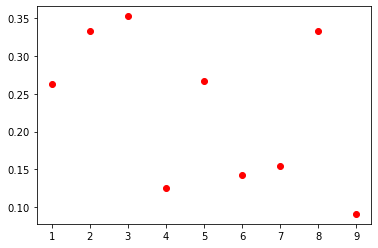

In [120]:
kk = range(1,10)
for k in kk:
    plt.plot(k, np.mean(arr[k:]*arr[:-k]),'ro')

0
i [ 1  2  4  9 12 14 15 16 17 18] [ 0  1  3  8 11 13 14 15 16 17]
v [1 1 2 1 1 1 1 1 1 1] [1 1 2 1 1 1 1 1 1 1]
common [ 1 14 15 16 17]
0
i [ 1  2  4  9 12 14 15 16 17] [ 0  2  7 10 12 13 14 15 16]
v [1 1 2 1 1 1 1 1 1] [1 2 1 1 1 1 1 1 1]
common [ 2 12 14 15 16]
0
i [ 1  2  4  9 12 14 15 16] [ 1  6  9 11 12 13 14 15]
v [1 1 2 1 1 1 1 1] [2 1 1 1 1 1 1 1]
common [ 1  9 12 14 15]
-1
i [ 1  2  4  9 12 14 15 16] [ 0  5  8 10 11 12 13 14]
v [1. 1. 2. 1. 1. 1. 1. 0.] [2 1 1 1 1 1 1 1]
common [12 14]
-1
i [ 1  2  4  9 12 14 15] [ 4  7  9 10 11 12 13]
v [1. 1. 2. 1. 1. 1. 0.] [1 1 1 1 1 1 1]
common [ 4  9 12]
-2
i [ 1  2  4  9 12 13 14] [ 3  6  8  9 10 11 12]
v [1. 1. 2. 1. 1. 0. 0.] [1 1 1 1 1 1 1]
common [ 9 12]
-2
i [ 1  2  4  9 12 13 14] [ 2  5  7  8  9 10 11]
v [1. 1. 2. 1. 1. 0. 0.] [1 1 1 1 1 1 1]
common [2 9]
-3
i [ 1  2  4  9 10 11 12] [ 1  4  6  7  8  9 10]
v [1. 1. 2. 1. 0. 0. 0.] [1 1 1 1 1 1 1]
common [ 1  4  9 10]
-3
i [ 1  2  4  9 10 11 12] [0 3 5 6 7 8 9]
v [1. 1. 2. 1. 0. 0

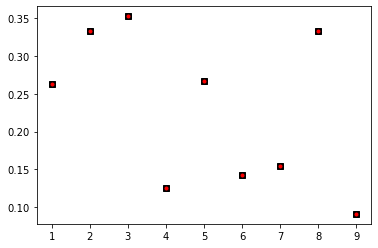

In [199]:
kk = range(1,10)
for k in kk:
    plt.plot(k, np.mean(arr[k:]*arr[:-k]),'ks')



n = 20#i[-1]
for k in kk:
    i0 = i[i < n-k]   
    ik = (i-k)[i >= k]    
    v0 = v[i < n-k]
    vk = v[i >= k]
    n0 = i0.shape[0]
    nk = ik.shape[0]
    shape_diff = n0 - nk
    #print(shape_diff)
    if shape_diff > 0:
        ik = np.append(ik, np.arange(ik[-1]+1, ik[-1]+1+shape_diff,1))
        vk = np.append(vk, np.zeros((shape_diff,)))
    elif shape_diff < 0:
        i0 = np.append(i0, np.arange(i0[-1]+1, i0[-1]+1-shape_diff,1))
        v0 = np.append(v0, np.zeros((-shape_diff,)))
    #print('i',i0, ik)
    #print('v',v0, vk)
    common_elements = np.intersect1d(i0, ik)
    print('common', common_elements)
    #a= np.arange(-1,6)
    #b=np.arange(-4,3);b
    kk1, kk2 = np.where( i0 == ik.reshape(-1,1))
    #(a[kk2] == b[kk1]).all()


    #inds1, = np.where(np.all(i0 == common_elements))
    #inds2, = np.where(np.all(ik == common_elements))
    #print(inds1)
    ck = np.sum(v0[kk2]*vk[kk1])/(n-k)
    plt.plot(k,ck,'r.')

In [196]:
a= np.arange(-1,6)
b=np.arange(-4,3);b
kk1, kk2 = np.where( a == b.reshape(-1,1))
(a[kk2] == b[kk1]).all()

True